<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/Granger_Causality_Statistical_Test_for_usefulness_Time_Series_Frecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [14]:
filepath='https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/appliance_energy_usage.csv'
df= pd.read_csv(filepath,index_col=0,parse_dates=True)

In [15]:
df.head()

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,60,30,6.600000,733.5,92.0,7.000000,5.3,63.000000
2016-01-11 17:10:00,60,30,6.483333,733.6,92.0,6.666667,5.2,59.166667
2016-01-11 17:20:00,50,30,6.366667,733.7,92.0,6.333333,5.1,55.333333
2016-01-11 17:30:00,50,40,6.250000,733.8,92.0,6.000000,5.0,51.500000
2016-01-11 17:40:00,60,40,6.133333,733.9,92.0,5.666667,4.9,47.666667


In [16]:
color_list =[
             "blue",
             "orange",
             "green",
             "red",
             "purple",
             "brown",
             "pink",
             "gray",
             "olive",
             "cyan",
]
date_key="date"


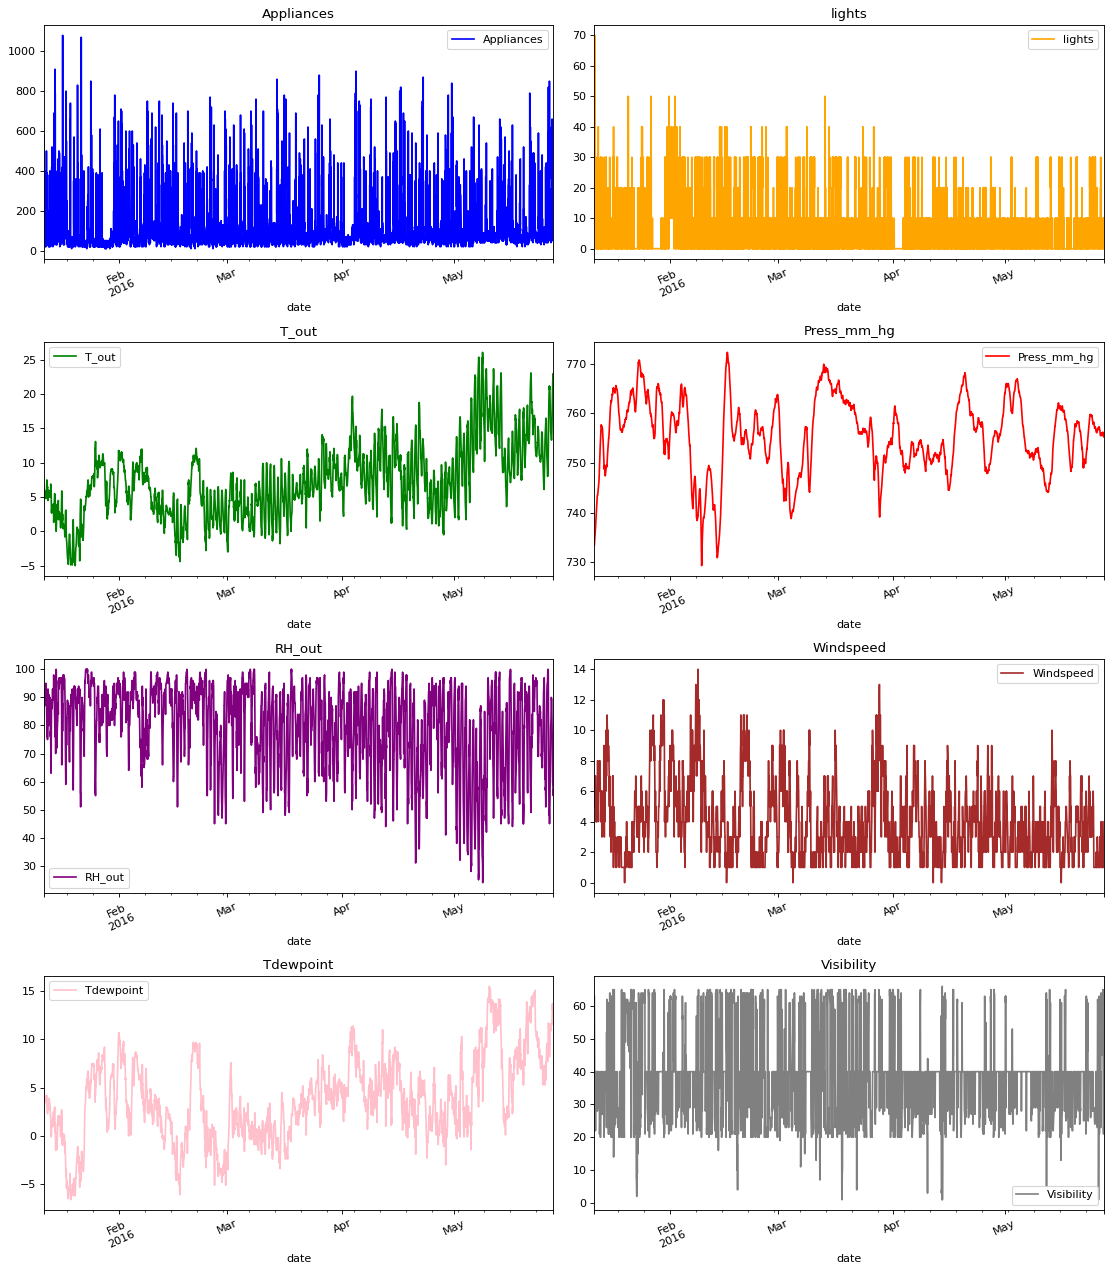

In [17]:
def visulalize(data):
  
  features = list(df.select_dtypes(include=[np.number]).columns
                  .values)
  feature_size =len(features)
  fig,axes = plt.subplots(
      nrows = int(np.ceil(feature_size/2)), ncols=2, figsize=(14,feature_size*2), dpi=80,facecolor="w",edgecolor="k"
  )

  for i in range(feature_size):
    key = features[i]
    c= color_list[i % (len(color_list))]
    t_data= data[key]
    t_data.head()
    ax= t_data.plot(
        ax =axes[i //2, i%2],
        color= c,
        title = "{}".format(key),
        rot =25,
    ) 
    ax.legend([key])
    plt.tight_layout()
visulalize(df)

In [18]:
df[['Appliances','T_out','lights']].corr(method='spearman')

,Appliances,T_out,lights
Appliances,1.000000,0.215504,0.302420
T_out,0.215504,1.000000,-0.072943
lights,0.302420,-0.072943,1.000000


In [20]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

In [22]:
result= adfuller(df['T_out'])
print(f'Test Statistics: {result[0]}')
print(f'P values: {result[1]}')
print(f'Critical values: {result[4]}')

if result[1] > 0.5:
  print('Series not Stationary')
else:
  print('SeriesStationary')

Test Statistics: -7.376706875075805
P values: 8.684210164027032e-11
Critical values: {'1%': -3.430682172927125, '5%': -2.8616868086315823, '10%': -2.5668481422453397}
SeriesStationary


In [23]:
max_lags=4

In [24]:
results = grangercausalitytests(df[['Appliances','T_out']],max_lags,verbose=False)

In [25]:
results

{1: ({'lrtest': (25.437220550869824, 4.570149887657645e-07, 1),
   'params_ftest': (25.44975243911685, 4.5808497276304875e-07, 19731.0, 1.0),
   'ssr_chi2test': (25.453621946849044, 4.5314611681095215e-07, 1),
   'ssr_ftest': (25.449752439104007, 4.580849727654541e-07, 19731.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (40.45919632949517, 1.6383140130210096e-09, 2),
   'params_ftest': (20.2452199516066, 1.64673329057097e-09, 19728.0, 2.0),
   'ssr_chi2test': (40.50070207879998, 1.6046646557857495e-09, 2),
   'ssr_ftest': (20.245219951618253, 1.6467332905524009e-09, 19728.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (36.095717710326426, 7.147428964923197e-08, 3),
   'params_ftest': (12.038645321089424, 7.188925511789674e-08, 19725.0, 3.0),
   'ssr_chi2test': (36.128752771742136, 7.033392227851859e-08, 3),
   'ssr_ftest': (12.038645321011785, 7.188925512605249e-08, 19725.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0

In [27]:
p_values =[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

In [29]:
print('P values per lag -  '+str(p_values))

P values per lag -  [0.0, 0.0, 0.0, 0.0]


In [30]:
results = grangercausalitytests(df[['Appliances','Visibility']],max_lags,verbose=False)

In [31]:
p_values =[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

In [32]:
print('P values per lag -  '+str(p_values))

P values per lag -  [0.822, 0.8877, 0.9698, 0.705]


In [33]:
results = grangercausalitytests(df[['T_out','Appliances']],max_lags,verbose=False)
p_values =[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
print('P values per lag -  '+str(p_values))

P values per lag -  [0.0, 0.4234, 0.3364, 0.4985]
